<a href="https://colab.research.google.com/github/Ignaciojeda/ProyectoCSSCrisDm/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de librerias

In [18]:
# Librerías generales
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, roc_auc_score


# Importación del dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

url = '/content/drive/MyDrive/TG_Machine_Learning/datos_datacss.csv'
# Cargar los datos
try:
    data = pd.read_csv(url, sep=",", encoding='latin-1', low_memory=False)
    print("Datos cargados exitosamente!")
except Exception as e:
    print(f"Error al cargar los datos: {e}")

Mounted at /content/drive
Datos cargados exitosamente!


# Análisis inicial de datos

**Análisis de la variable objetivo**

In [3]:
print("Distribución del valor de equipamiento inicial:")
print(data['RoundStartingEquipmentValue'].describe())

Distribución del valor de equipamiento inicial:
count    79157.000000
mean      3778.108695
std       2111.285406
min          0.000000
25%       1600.000000
50%       4700.000000
75%       5200.000000
max       8850.000000
Name: RoundStartingEquipmentValue, dtype: float64


**Visualización de la distribución**

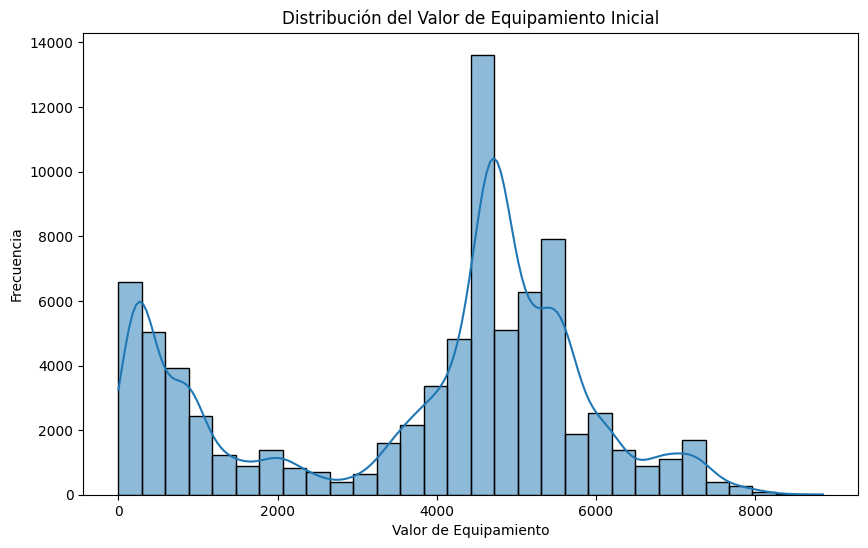

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data['RoundStartingEquipmentValue'], bins=30, kde=True)
plt.title('Distribución del Valor de Equipamiento Inicial')
plt.xlabel('Valor de Equipamiento')
plt.ylabel('Frecuencia')
plt.show()

# Definición de Variables Predictoras y Objetivo

In [19]:
# Variable objetivo
y = data['RoundStartingEquipmentValue']

# Variables predictoras
X = data[['TeamStartingEquipmentValue', 'RoundId']]

# División del Conjunto de Datos

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (55409, 2)
Tamaño del conjunto de prueba: (23748, 2)


# Entrenamiento del modelo Random Forest

In [6]:
# Creación y entrenamiento del modelo básico
rf_basic = RandomForestRegressor(n_estimators=100, random_state=42, verbose=1)
rf_basic.fit(X_train, y_train)

# Evaluación del modelo básico
y_pred_basic = rf_basic.predict(X_test)
mse_basic = mean_squared_error(y_test, y_pred_basic)
r2_basic = r2_score(y_test, y_pred_basic)

print("\nResultados del modelo básico:")
print(f"Error Cuadrático Medio (MSE): {mse_basic:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_basic:.2f}")

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.4s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s



Resultados del modelo básico:
Error Cuadrático Medio (MSE): 910546.22
Coeficiente de Determinación (R²): 0.80


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


# Función para Mostrar Resultados

In [21]:
def mostrar_resultados(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print("\nEvaluación del modelo:")
    print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
    print(f"Coeficiente de Determinación (R²): {r2:.2f}")

    # Discretización para matriz de confusión
    y_true_rounded = np.round(y_true, -3)
    y_pred_rounded = np.round(y_pred, -3)

    cm = confusion_matrix(y_true_rounded, y_pred_rounded)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Matriz de Confusión (valores redondeados)")
    plt.xlabel("Predicción")
    plt.ylabel("Valor real")
    plt.show()

    try:
        roc_value = roc_auc_score(y_true_rounded, y_pred_rounded)
        print(f"ROC AUC Score (con redondeo): {roc_value:.2f}")
    except:
        print("ROC AUC no pudo calcularse. Verifica que haya al menos 2 clases diferentes.")


# Modelo Random Forest - 100 Árboles

In [22]:
model_100 = RandomForestRegressor(n_estimators=100,
                                  max_features='sqrt',
                                  bootstrap=True,
                                  random_state=42,
                                  verbose=1)

model_100.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.2s finished


RandomForestRegressor(max_features='sqrt', random_state=42, verbose=1)

# Evaluamos el Modelo de 100 Árboles

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished



Evaluación del modelo:
Error Cuadrático Medio (MSE): 910245.37
Coeficiente de Determinación (R²): 0.80


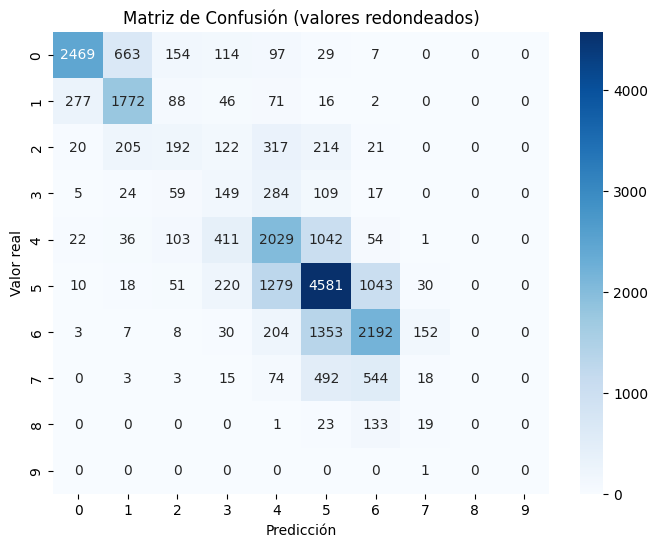

ROC AUC no pudo calcularse. Verifica que haya al menos 2 clases diferentes.


In [23]:
pred_y_100 = model_100.predict(X_test)
mostrar_resultados(y_test, pred_y_100)

# Modelo Random Forest - 500 Árboles + Regularización

In [24]:
model_500 = RandomForestRegressor(n_estimators=500,
                                  max_features='sqrt',
                                  max_depth=10,
                                  bootstrap=True,
                                  random_state=42,
                                  verbose=1)

model_500.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   17.3s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   18.6s finished


RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=500,
                      random_state=42, verbose=1)

# Evaluamos el Modelo de 500 Árboles

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.2s finished



Evaluación del modelo:
Error Cuadrático Medio (MSE): 707466.54
Coeficiente de Determinación (R²): 0.84


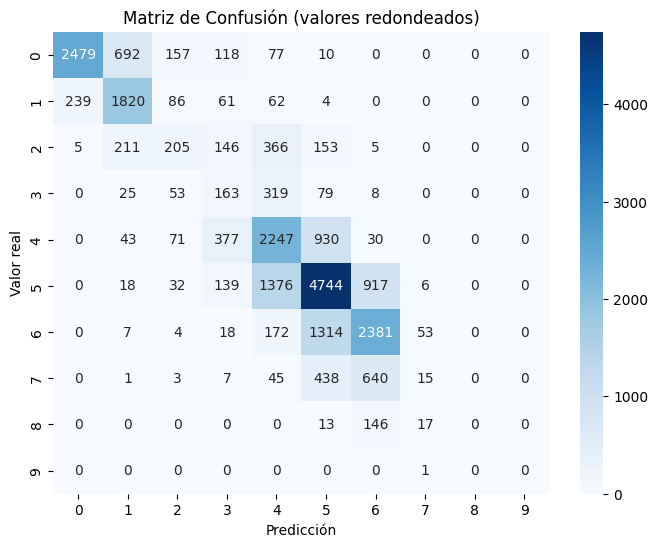

ROC AUC no pudo calcularse. Verifica que haya al menos 2 clases diferentes.
Error Absoluto Medio (MAE): 531.25


In [36]:
pred_y_500 = model_500.predict(X_test)
mostrar_resultados(y_test, pred_y_500)
mae_500 = mean_absolute_error(y_test, pred_y_500)

print(f"Error Absoluto Medio (MAE): {mae_500:.2f}")

# Visualización: Reales vs Predichos

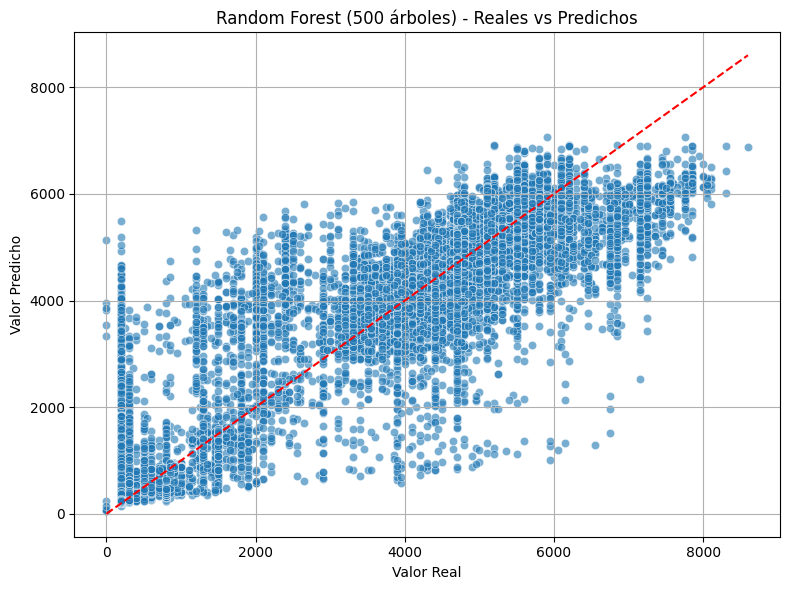

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=pred_y_500, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.title("Random Forest (500 árboles) - Reales vs Predichos")
plt.grid()
plt.tight_layout()
plt.show()

# Importancia de Características

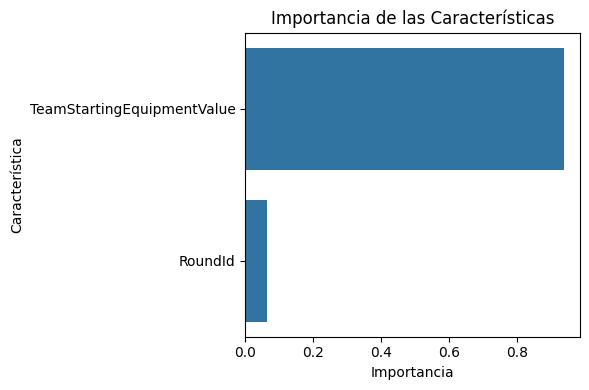

In [27]:
importances = model_500.feature_importances_
feature_names = X.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=feature_names)
plt.title("Importancia de las Características")
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.tight_layout()
plt.show()

# Analisis

Se analiza el rendimiento del modelo de Random Forest Regressor con 100–500 árboles sobre el conjunto de prueba. Evaluaremos el error, la precisión, la dispersión entre los valores reales y predichos, y visualizaremos la matriz de error.

# Visualización: Valor Real vs Valor Predicho

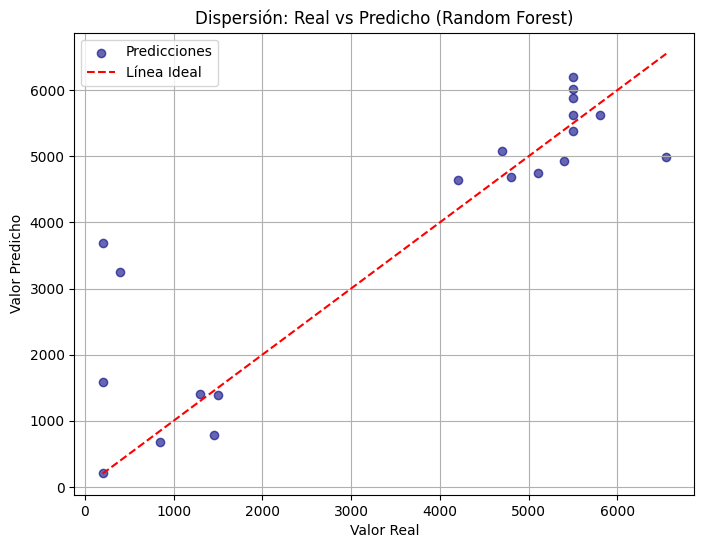

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_real, y_pred, color='navy', alpha=0.6, label="Predicciones")
plt.plot([min(y_real), max(y_real)], [min(y_real), max(y_real)], 'r--', label="Línea Ideal")
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.title("Dispersión: Real vs Predicho (Random Forest)")
plt.legend()
plt.grid(True)
plt.show()


# Analisis completo de random forest de 500 arboles


# 1. Error Cuadrático Medio (MSE): 707,466.54
Este valor mide el promedio de los errores al cuadrado, penalizando más los errores grandes.

Este MSE es relativamente alto, lo cual indica que algunos errores extremos están afectando el rendimiento del modelo, probablemente en los valores bajos (como ya observamos).
# 2. Error Absoluto Medio (MAE): 531.25
Este valor indica que, en promedio, las predicciones se desvían 531 unidades del valor real.

 Dado que los valores reales oscilan entre 1000 y 6000, un MAE de ~531 representa aproximadamente un error del 10%, lo cual es razonablemente aceptable para muchas aplicaciones prácticas. Aun así, hay espacio para optimización.

# 3. Coeficiente de Determinación (R²): 0.84
Este valor indica que el modelo explica el 84% de la varianza de la variable objetivo
Un R² de 0.84 es bastante bueno y sugiere que el modelo captura adecuadamente la relación entre las variables predictoras y la variable objetivo.
Sin embargo, para aplicaciones críticas o de producción, se sugiere aspirar a R² ≥ 0.85 para mayor robustez.

